In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataset source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

df = pd.read_csv("skoda.csv")

display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5
...,...,...,...,...,...,...,...,...
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,44.8,1.2
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,56.5,1.4
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,61.4,1.0
6265,Citigo,2016,5999,Manual,21747,Petrol,62.8,1.0


### Unique value count for "model" column

In [3]:
model_count = df['model'].value_counts()
display(model_count)

 Fabia           1571
 Octavia         1477
 Superb           791
 Kodiaq           472
 Citigo           470
 Yeti Outdoor     458
 Karoq            390
 Scala            192
 Rapid            152
 Kamiq            141
 Yeti             136
 Roomster          17
Name: model, dtype: int64

### Unique value count for "year" column

In [4]:
year_count = df['year'].value_counts()
display(year_count)

2019    2114
2017    1539
2018     874
2016     840
2015     285
2020     276
2014     183
2013      93
2012      17
2011      14
2010      10
2009       6
2008       6
2007       4
2006       3
2005       2
2004       1
Name: year, dtype: int64

### Unique value count for "transmission" column

In [5]:
transmission_count = df['transmission'].value_counts()
display(transmission_count)

Manual       3754
Semi-Auto    1408
Automatic    1104
Other           1
Name: transmission, dtype: int64

### Unique value count for "fuelType" column

In [6]:
fuelType_count = df['fuelType'].value_counts()
display(fuelType_count)

Petrol    4171
Diesel    2069
Hybrid      18
Other        9
Name: fuelType, dtype: int64

###  Creating a function to find the number of observations for unique value in a column of a DataFrame

In [7]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [8]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

### Creating a function to show the number of observations for each unique value in a column using a barplot

In [9]:
def barplot(data, column_x, color, rotation, yticks):
    
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    plt.title("Number of cars present for each " + column_x)
    
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    plt.xticks(rotation=rotation)
    
    plt.yticks(yticks)

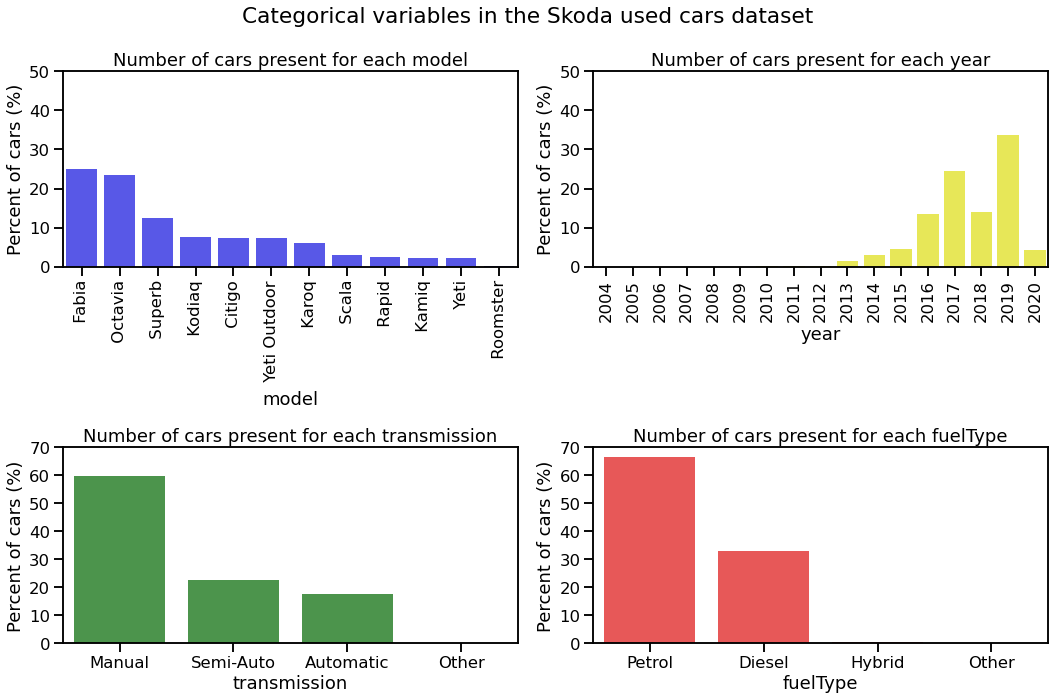

In [10]:
sns.set_context('talk')

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

plt.subplot(2,2,2)
barplot(year_count, 'year', 'yellow', 90, np.arange(0,51,10))

plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'red', 0, np.arange(0,71,10))

plt.suptitle("Categorical variables in the Skoda used cars dataset")

plt.tight_layout()

plt.show()